# Loan Prediction -To Predict Whether Loan will be Approved Or Not Based on the given parameter

__Predict whether loan can be approved or not for the customers depending on the given features.__

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df = pd.read_csv("Loan Prediction.csv")

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

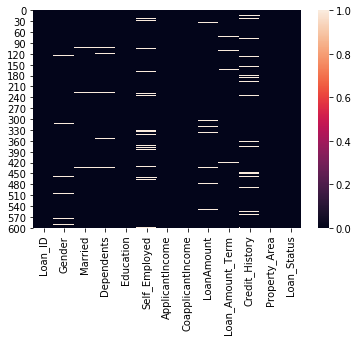

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.shape

(614, 13)

# Missing Values Treatment:

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
len(df)

614

In [14]:
df["Gender"].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

Male      489
Female    112
Name: Gender, dtype: int64


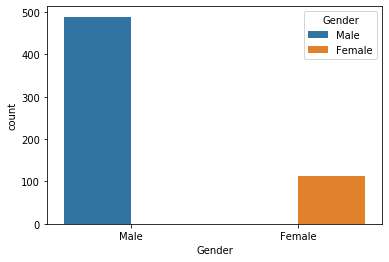

In [16]:
print(df["Gender"].value_counts())
sns.countplot(x="Gender",data=df,hue="Gender")


Gender  Married
Female  No          80
        Yes         31
Male    Yes        357
        No         130
Name: Married, dtype: int64


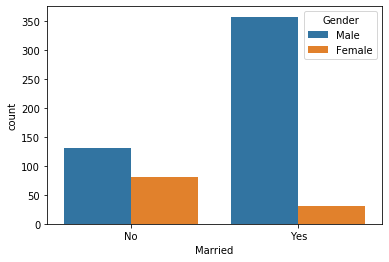

In [17]:
print(df.groupby("Gender")["Married"].value_counts())
sns.countplot(x="Married",data=df,hue="Gender")

Gender  Dependents
Female  0              80
        1              19
        2               7
        3+              3
Male    0             258
        2              92
        1              82
        3+             45
Name: Dependents, dtype: int64


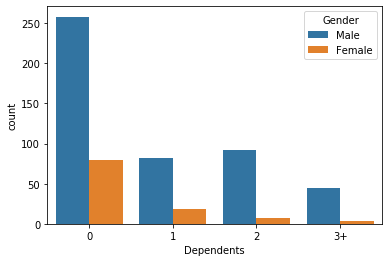

In [18]:
print(df.groupby("Gender")["Dependents"].value_counts())
sns.countplot(x="Dependents",data=df,hue="Gender")

Gender  Self_Employed
Female  No                89
        Yes               15
Male    No               402
        Yes               63
Name: Self_Employed, dtype: int64


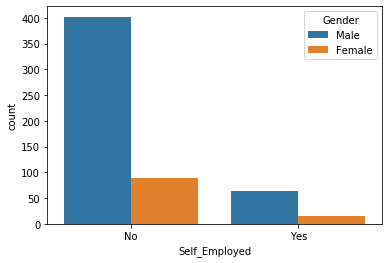

In [19]:
print(df.groupby("Gender")["Self_Employed"].value_counts())
sns.countplot(x="Self_Employed",data=df,hue="Gender")

Gender  Loan_Amount_Term
Female  360.0                98
        480.0                 4
        180.0                 3
        36.0                  1
        84.0                  1
        240.0                 1
        300.0                 1
Male    360.0               403
        180.0                40
        300.0                11
        480.0                11
        84.0                  3
        120.0                 3
        240.0                 3
        60.0                  2
        12.0                  1
        36.0                  1
Name: Loan_Amount_Term, dtype: int64


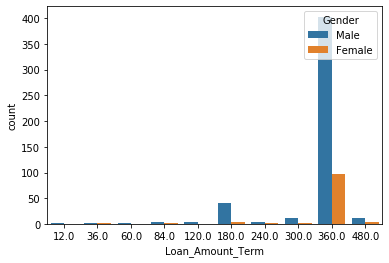

In [20]:
print(df.groupby("Gender")["Loan_Amount_Term"].value_counts())
sns.countplot(x="Loan_Amount_Term",data=df,hue="Gender")

Gender  Credit_History
Female  1.0                84
        0.0                17
Male    1.0               382
        0.0                69
Name: Credit_History, dtype: int64


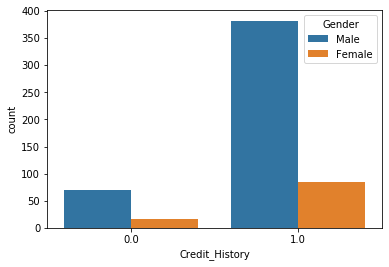

In [21]:
print(df.groupby("Gender")["Credit_History"].value_counts())
sns.countplot(x="Credit_History",data=df,hue="Gender")


In [22]:
df["Gender"].mode()


0    Male
dtype: object

In [23]:
from statistics import mode
from statistics import mean
from statistics import median


In [24]:
df["LoanAmount"].mean()


146.41216216216216

In [25]:
values = {
           "Gender" : mode(df["Gender"]),
           "Married" : mode(df["Married"]),
           "Dependents" : mode(df["Dependents"]),
           "Self_Employed" : mode(df["Self_Employed"]),
           "Loan_Amount_Term" : mode(df["Loan_Amount_Term"]),
           "Credit_History" : mode(df["Credit_History"]),
           "LoanAmount" : df["LoanAmount"].mean()
        
}

In [26]:
df.fillna(values,inplace=True)

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Treatment:

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
import math

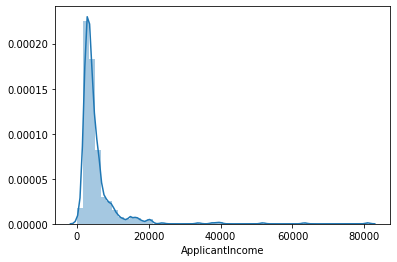

In [30]:
sns.distplot(df["ApplicantIncome"])

In [31]:
df["ApplicantIncome"]=df["ApplicantIncome"].apply(np.log)

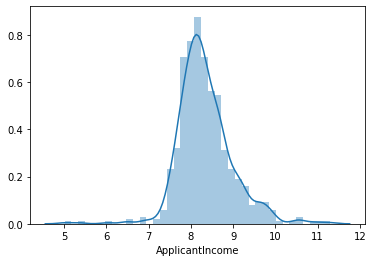

In [32]:
sns.distplot(df["ApplicantIncome"])

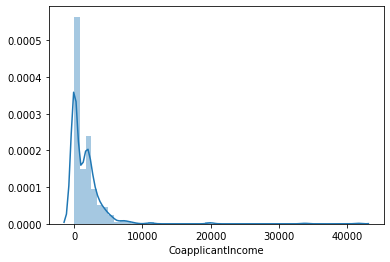

In [33]:
sns.distplot(df["CoapplicantIncome"])


In [34]:
df["CoapplicantIncome"].isnull().sum()


0

In [35]:
df["CoapplicantIncome"]=df["CoapplicantIncome"].apply(np.log)

In [36]:
df["CoapplicantIncome"].isnull().sum()


0

In [37]:
len(df["CoapplicantIncome"])


614

In [38]:
np.isfinite(df["CoapplicantIncome"]).sum()


341

In [39]:
df["CoapplicantIncome"]=df["CoapplicantIncome"].replace([np.inf, -np.inf], np.nan)

In [40]:
df["CoapplicantIncome"].isnull().sum()


273

In [41]:
df["CoapplicantIncome"].mean()

7.724035782644366

In [42]:
df["CoapplicantIncome"]=df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean())

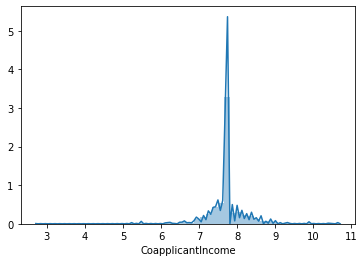

In [43]:
sns.distplot(df["CoapplicantIncome"])


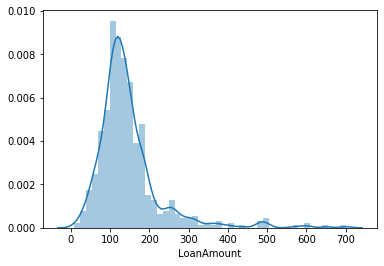

In [44]:
sns.distplot(df["LoanAmount"])


In [45]:
df["LoanAmount"]=df["LoanAmount"].apply(np.log)

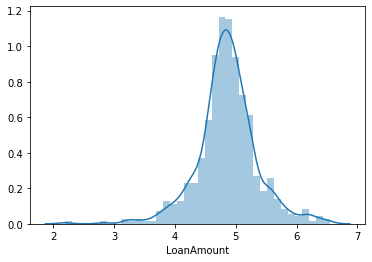

In [46]:
sns.distplot(df["LoanAmount"])


In [47]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,7.724036,4.986426,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,7.724036,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,7.724036,4.948760,360.0,1.0,Urban,Y


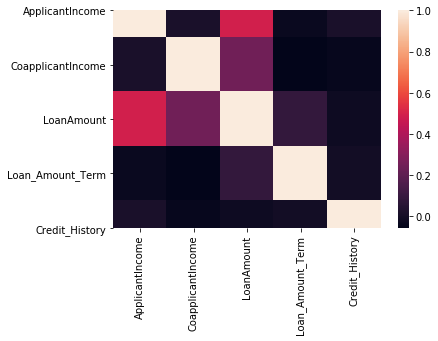

In [48]:
sns.heatmap(df.corr())


# Encoding:

In [49]:
y = df["Loan_Status"]
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [50]:

y = pd.get_dummies(y, drop_first=True)
y.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [51]:
X = df.drop(["Loan_ID","Loan_Status"], axis="columns")
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674026,7.724036,4.986426,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006368,7.724036,4.189655,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban
4,Male,No,0,Graduate,No,8.699515,7.724036,4.948760,360.0,1.0,Urban


In [52]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674026,7.724036,4.986426,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430109,7.318540,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006368,7.724036,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.856707,7.765569,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699515,7.724036,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1


# Train-Test Split:

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Logistic regression:

In [54]:
from sklearn.linear_model import LogisticRegression
import warnings; warnings.simplefilter('ignore')
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = lr.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 26  35]
 [  3 121]]
Accuracy Percentage = 0.7945945945945946
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        61
           1       0.78      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185



# Naive Bayes:

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [58]:
from sklearn.naive_bayes import GaussianNB
import warnings; warnings.simplefilter('ignore')
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_pred = nb.predict(X_test)


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 25  36]
 [  2 122]]
Accuracy Percentage = 0.7945945945945946
              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185



# Random Forest:

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, criterion='entropy')
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred = rfc.predict(X_test)


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 27  31]
 [ 16 111]]
Accuracy Percentage = 0.745945945945946
              precision    recall  f1-score   support

           0       0.63      0.47      0.53        58
           1       0.78      0.87      0.83       127

    accuracy                           0.75       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.73      0.75      0.73       185



# Support Vector Machines:

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [66]:
from sklearn.svm import SVC
svml = SVC(kernel = 'linear')
svml.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
y_pred = svml.predict(X_test)


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 27  28]
 [  3 127]]
Accuracy Percentage = 0.8324324324324325
              precision    recall  f1-score   support

           0       0.90      0.49      0.64        55
           1       0.82      0.98      0.89       130

    accuracy                           0.83       185
   macro avg       0.86      0.73      0.76       185
weighted avg       0.84      0.83      0.82       185



# K-Nearest Neighbors:

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
y_pred = knc.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 15  39]
 [ 11 120]]
Accuracy Percentage = 0.7297297297297297
              precision    recall  f1-score   support

           0       0.58      0.28      0.38        54
           1       0.75      0.92      0.83       131

    accuracy                           0.73       185
   macro avg       0.67      0.60      0.60       185
weighted avg       0.70      0.73      0.70       185



# Feature Scaling:

# 1. Normalization:

In Normalization we will get values in range of 0-1

In [77]:
from sklearn.preprocessing import Normalizer
nr = Normalizer()
X1 = nr.fit_transform(X)


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)

# Logistic Regression:

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = lr.predict(X_test)


In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  56]
 [  0 129]]
Accuracy Percentage = 0.6972972972972973
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.70      1.00      0.82       129

    accuracy                           0.70       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.49      0.70      0.57       185



# K-Nearest Neighbors:


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)


In [103]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
y_pred = knc.predict(X_test)


In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 21  35]
 [  6 123]]
Accuracy Percentage = 0.7783783783783784
              precision    recall  f1-score   support

           0       0.78      0.38      0.51        56
           1       0.78      0.95      0.86       129

    accuracy                           0.78       185
   macro avg       0.78      0.66      0.68       185
weighted avg       0.78      0.78      0.75       185



# 2. Standardization:

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X)

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3)

# Logistic Regression:

In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred = lr.predict(X_test)


In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 25  37]
 [  1 122]]
Accuracy Percentage = 0.7945945945945946
              precision    recall  f1-score   support

           0       0.96      0.40      0.57        62
           1       0.77      0.99      0.87       123

    accuracy                           0.79       185
   macro avg       0.86      0.70      0.72       185
weighted avg       0.83      0.79      0.77       185



# K-Nearest Neighbors:

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3)


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
y_pred = knc.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 23  25]
 [ 10 127]]
Accuracy Percentage = 0.8108108108108109
              precision    recall  f1-score   support

           0       0.70      0.48      0.57        48
           1       0.84      0.93      0.88       137

    accuracy                           0.81       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.80      0.81      0.80       185

